In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from src.quat_class import quat_class
from src.util import plot_tools, load_tools, process_tools, quat_tools

# Load data

In [32]:
# p_raw, q_raw, t_raw, dt = load_tools.load_npy()
p_raw, q_raw, t_raw, dt = load_tools.load_clfd_dataset(task_id=3, num_traj=5, sub_sample=1)
# p_raw, q_raw, t_raw = load_tools.load_demo_dataset()

# Process data

In [ ]:
p_in, q_in_list, t_in             = process_tools.pre_process(p_raw, q_raw, t_raw, opt= "savgol")
p_out, q_out                 = process_tools.compute_output(p_in, q_in_list, t_in)
p_init, q_init_list, p_att, q_att = process_tools.extract_state(p_in, q_in_list)
p_in, q_in, p_out, q_out     = process_tools.rollout_list(p_in, q_in_list, p_out, q_out)

# Begin learning

In [35]:
quat_obj = quat_class(q_in, q_out, q_att, dt, K_init=4)
quat_obj.begin()

# Evaluate

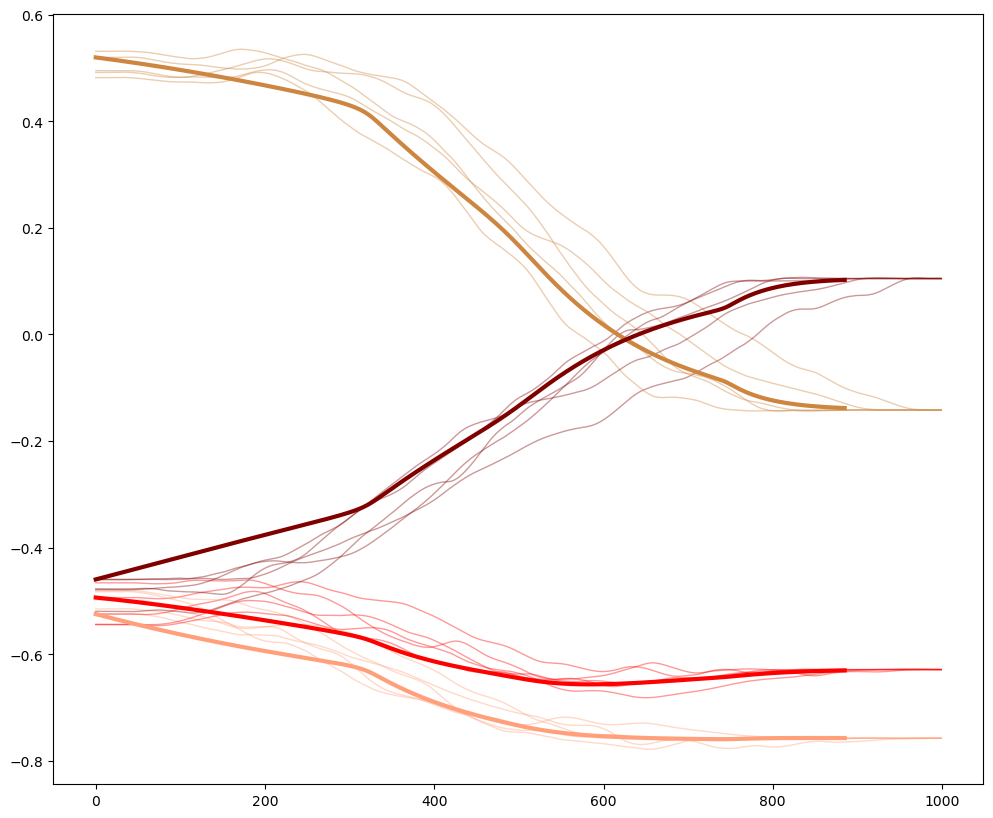

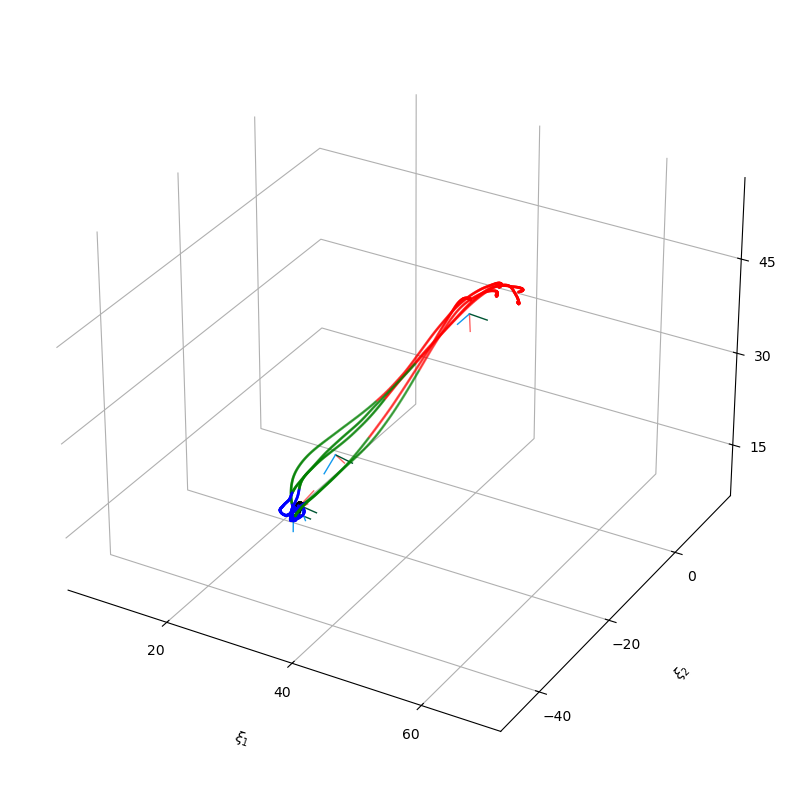

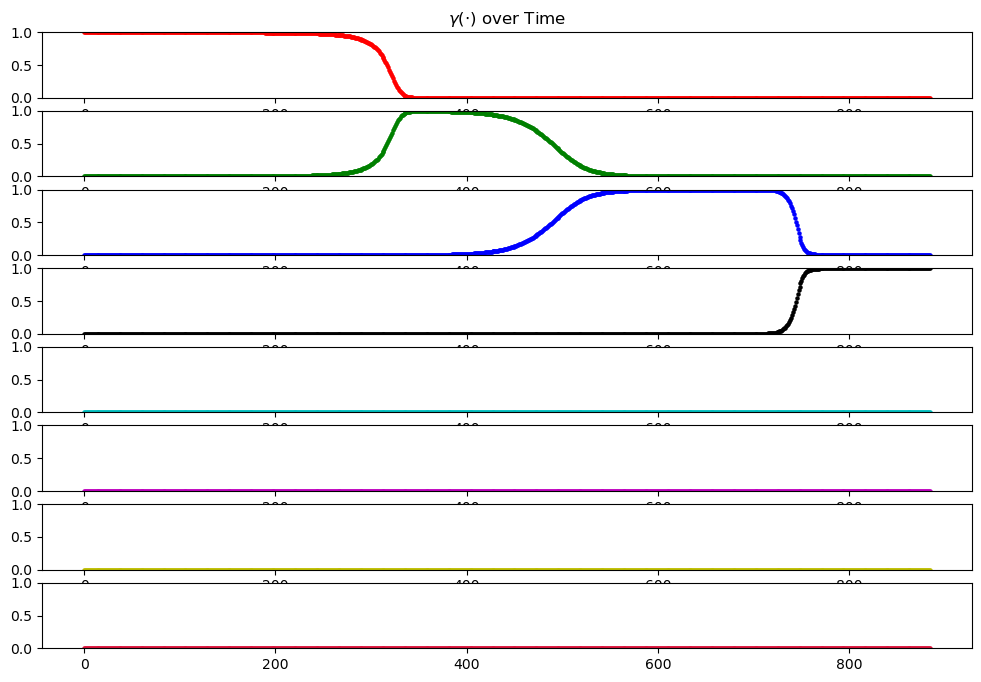

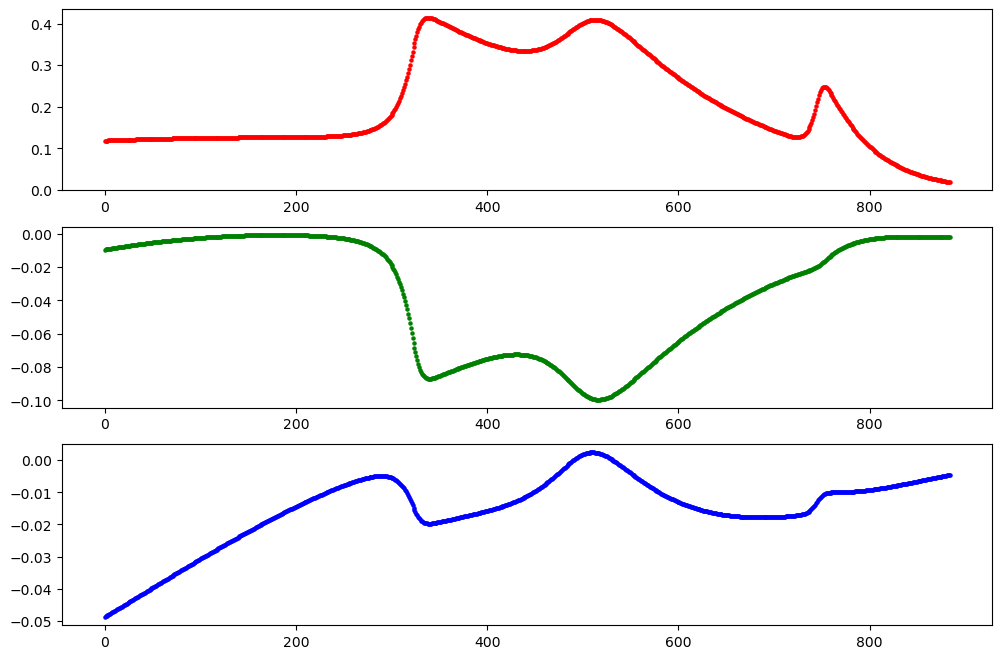

In [ ]:
q_init = R.from_quat(q_init_list[0].as_quat())
q_test, gamma_test, omega_test = quat_obj.sim(q_init, step_size=0.01)

plot_tools.plot_traj(q_in_list, q_test)
plot_tools.plot_gmm(p_in, quat_obj.gmm)
plot_tools.plot_gamma(gamma_test)
plot_tools.plot_omega(omega_test)

plt.show()